In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/telco_customer_churn_cleaned.csv") 
sns.set(style="whitegrid")


Value counts for gender:
gender
Male      3549
Female    3483
Name: count, dtype: int64


C:\Users\nafiz\AppData\Local\Temp\ipykernel_18536\2750247653.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


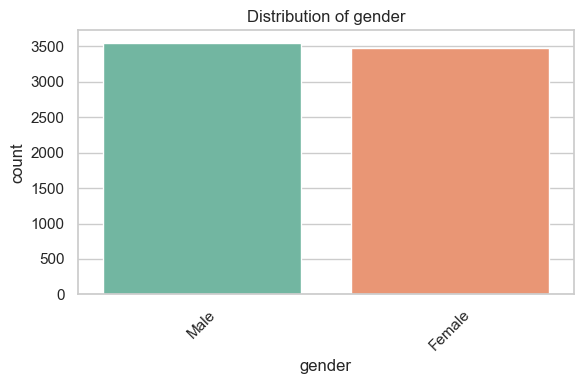


Value counts for senior_citizen:
senior_citizen
No     5890
Yes    1142
Name: count, dtype: int64


C:\Users\nafiz\AppData\Local\Temp\ipykernel_18536\2750247653.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


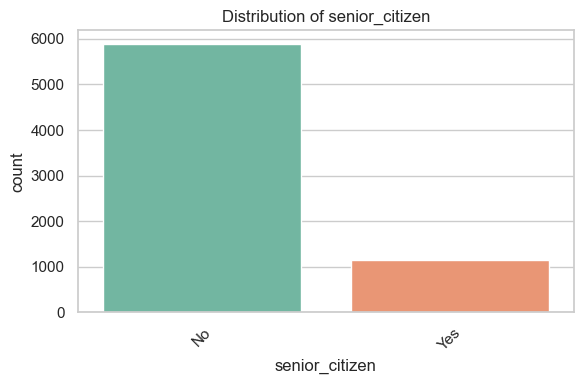


Value counts for partner:
partner
No     3639
Yes    3393
Name: count, dtype: int64


C:\Users\nafiz\AppData\Local\Temp\ipykernel_18536\2750247653.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


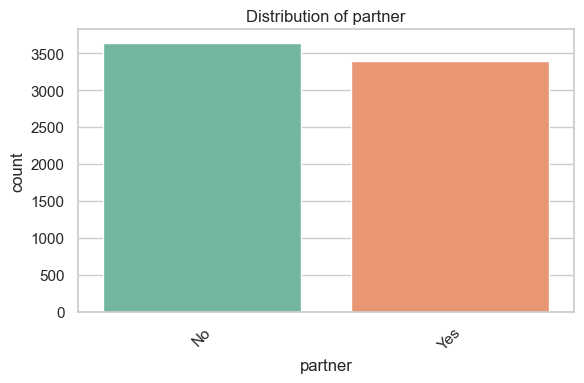


Value counts for dependents:
dependents
No     5412
Yes    1620
Name: count, dtype: int64


C:\Users\nafiz\AppData\Local\Temp\ipykernel_18536\2750247653.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


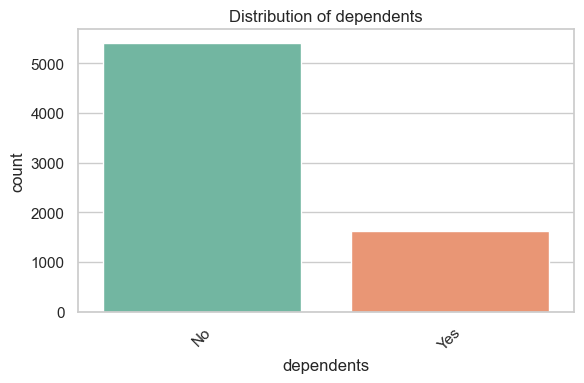


Value counts for internet_service:
internet_service
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


C:\Users\nafiz\AppData\Local\Temp\ipykernel_18536\2750247653.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


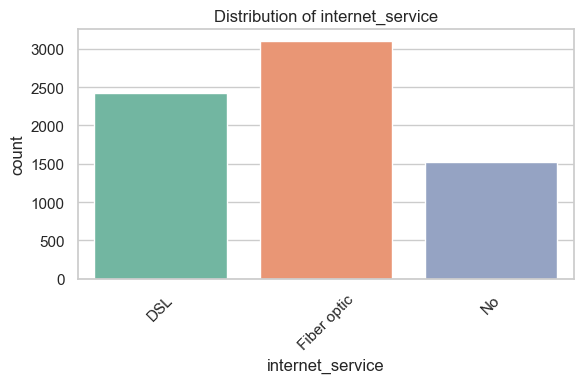


Value counts for contract:
contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64


C:\Users\nafiz\AppData\Local\Temp\ipykernel_18536\2750247653.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


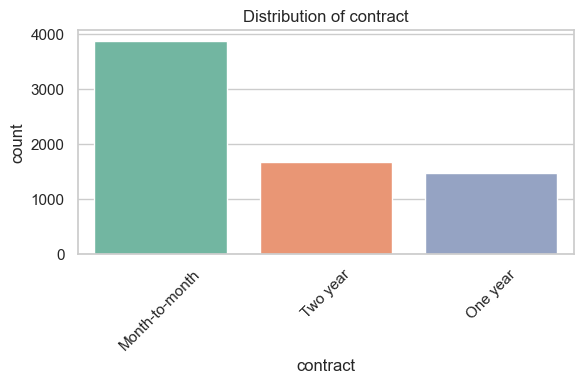


Value counts for payment_method:
payment_method
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64


C:\Users\nafiz\AppData\Local\Temp\ipykernel_18536\2750247653.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


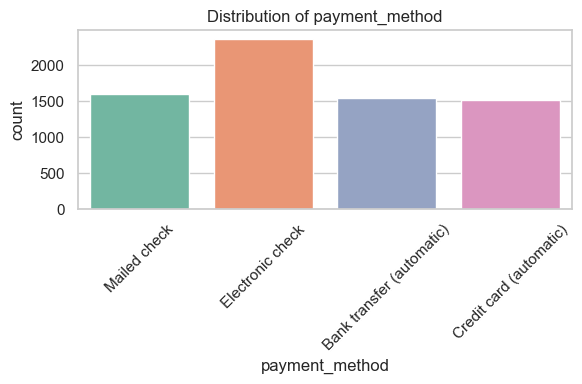


Value counts for paperless_billing:
paperless_billing
Yes    4168
No     2864
Name: count, dtype: int64


C:\Users\nafiz\AppData\Local\Temp\ipykernel_18536\2750247653.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


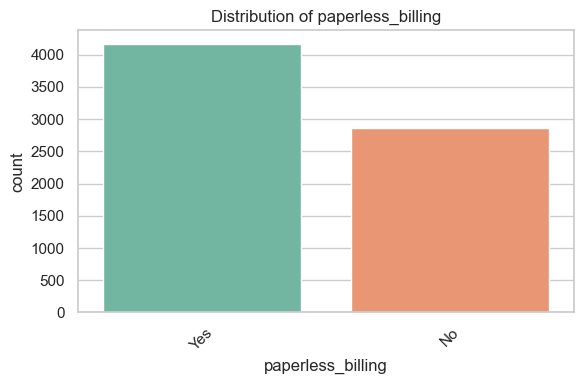

In [2]:
#1: Univariate Analysis

# Categorical variables
categorical_cols = ['gender', 'senior_citizen', 'partner', 'dependents',
                    'internet_service', 'contract', 'payment_method', 'paperless_billing']

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"../visuals/plots/{col}_distribution.png")
    plt.show()
    plt.close()

In [ ]:
# Numerical variables
numerical_cols = ['tenure_months', 'monthly_charges', 'total_charges', 'churn_score', 'cltv']

for col in numerical_cols:
    print(f"\nSummary statistics for {col}:")
    print(df[col].describe())
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.savefig(f"../visuals/plots/{col}_histogram.png")
    plt.show()
    plt.close()

In [ ]:

# 2: Bivariate Analysis (categorical vs churn_label)

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    pd.crosstab(df[col], df['churn_label']).plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set2')
    plt.title(f"{col} vs Churn")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"../visuals/plots/{col}_vs_churn.png")
    plt.show()
    plt.close()


In [ ]:
# 3. Bivariate Analysis (numerical vs churn_label)

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='churn_label', y=col, data=df, palette="Set3")
    plt.title(f"{col} by Churn Label")
    plt.tight_layout()
    plt.savefig(f"../visuals/plots/{col}_by_churn.png")
    plt.show()
    plt.close()

In [ ]:
#4. Correlation Analysis

corr_cols = numerical_cols + ['churn_value']
corr = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("../visuals/plots/correlation_heatmap.png")
plt.show()
plt.close()

In [ ]:
# 5. Optional: Geographical Insights

# Churn rate by state
churn_by_state = df.groupby('state')['churn_value'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
churn_by_state.plot(kind='bar', color='salmon')
plt.title("Churn Rate by State")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visuals/plots/churn_by_state.png")
plt.show()
plt.close()